# Synthetic Accessibility Score of Drug-Like Molecules in RDKit

### Introduction

The synthetic accessibility score (SAscore) provides an estimation of how easy it is to synthesize a given molecule. Developed by Peter Ertl and Ansgar Schuffenhauer, the SAscore combines fragment contributions and molecular complexity to generate a score between 1 (easy to synthesize) and 10 (difficult to synthesize). This is particularly useful in drug discovery to help prioritize molecules based on their synthetic feasibility. In this notebook, we will explore how to calculate the SAscore using RDKit, a popular cheminformatics toolkit in Python.

Adapted from: Estimation of synthetic accessibility score of drug-like molecules based on molecular complexity and fragment contributions

Peter Ertl & Ansgar Schuffenhauer 
Journal of Cheminformatics volume 1, Article number: 8 (2009) (https://jcheminf.biomedcentral.com/articles/10.1186/1758-2946-1-8)

### Dependencies

To run the code in this notebook, you need to install RDKit. You can install it using the following command in your terminal: conda install -c conda-forge rdkit


In [13]:
# to run on colab


!pip install -q condacolab
import condacolab
condacolab.install()
!conda install -c conda-forge rdkit


aau_token         environments.txt  envs/


In [17]:
ls ../../.conda

aau_token         environments.txt  envs/


In [18]:
# Importing Necessary Libraries
%pwd
import os
import sys
sys.path.append(os.path.join('..', '..', '.conda', 'envs', 'molecular_informatics', 'share', 'RDKit','Contrib'))
from SA_Score import sascorer
from NP_Score import npscorer
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

### Calculating Synthetic Accessibility Score

The `sascorer` module provides a function `calculateScore()` to estimate the synthetic accessibility score of a molecule. Let's take an example of some commonly used molecules.
### SAscore = fragmentScore − complexityPenalty
605,864 different fragment types were obtained by fragmenting 934,046 PubChem structures. Most of them (51%) are singletons (present only once in
the whole set). Only a relatively small number of fragments, namely 3759 (0.62%), are frequent (i.e. present more than 1000-times in the database).
the contribution for each fragment has been calculated as a logarithm
of the ratio between the actual fragment count and the number of fragments forming 80% of all fragments in the database. As a result the frequent fragments have positive
scores and less frequent fragments have negative
scores.

The complexityScore is calculated as a combination of ringComplexityScore, stereoComplexityScore, macrocyclePenalty and the sizePenalty.

### stereoComplexityScore = log(nStereoCenters + 1)
### macrocyclePenalty = log(nMacrocycles + 1) (for rings > 8)
### sizePenalty = natoms**1.005 − natoms

In [25]:
smiles_list = [
    'CC(C)CC1=CC=C(C=C1)C(C)C(=O)O',       # Ibuprofen
    'CC1=CC=CC=C1C(=O)O',                  # Salicylic acid
    'CC(C)NCC(O)COC1=CC=CC=C1',            # Pseudoephedrine
    'CCC1(CC(C)CO1)OC(=O)NCC2=CC=C(C=C2)O',# Naproxen
    'CC(C)C1=CC=C(C=C1)C(=O)O',            # Fenoprofen
    'CC(C)(C)C1=CC=CC=C1O',                # Thymol
    'CCN(CC)CCOC1=CC=CC=C1',               # Lidocaine
    'CC(C)CC(=O)NC1=CC=CC=C1Cl',           # Diclofenac
    'CC1=C(C(C(C(=O)O1)C)O)C(=O)O',        # Ascorbic acid
    'CC(=O)OC1=CC=CC=C1C(=O)O',            # Aspirin
    'C1=CC=C(C=C1)C=O',                    # Benzaldehyde
    'CCOC(=O)C1=CC=CC=C1',                 # Ethyl benzoate
    'CC(C)CC(C(=O)O)NC(=O)C1=CC=CC=C1',    # Acetaminophen
    'CN1C=NC2=C1C=NC=N2',                  # Caffeine
    'COC1=CC=CC=C1OC',                     # Anisole
    'CNC(=O)C1=CC=CC=C1',                  # Acetanilide
    'CC1=CC=C(C=C1)N',                     # Aniline
    'C1=CC(=CC=C1O)C=O',                   # Vanillin
    'CCOC(=O)C1=CC=C(C=C1)O',              # Methyl salicylate
    'CC(=O)NCCC1=CC=CC=C1',                # Tryptamine
    'COC1=C(C=CC(=C1)O)C(=O)O',            # Gallic acid
    'CCOC(=O)CC(=O)OCC',                   # Diethyl malonate
    'CC(=O)OC1=CC(=C(C=C1)O)C(=O)O',       # Ethyl gallate
    'COC1=CC=C(C=C1)C(=O)O',               # Methyl benzoate
    'CCCCCCCCCCCCCCCC(=O)OCC',             # Ethyl palmitate
    'CCCCCCCCCCCCCCCC(=O)O',               # Palmitic acid
    'CCCCCCCCCCCCCCCC(=O)OC(C)=O',         # Ethyl stearate
    'C1=CC=C2C(=C1)C=CC=C2O',              # Beta-naphthol
    'C1=CC=C(C=C1)S(=O)(=O)C',             # Tosyl chloride
    'COC1=CC=C(C=C1)OC',                   # Dimethoxybenzene
    'CC1=C(C=C(C=C1)O)O',                  # Catechol
    'CCCCCCCCCC(=O)OCC',                   # Ethyl laurate
    'CCCCCCCCCCCCCCCCCC(=O)OCC',           # Ethyl behenate
    'CCCCCCCCCC(=O)NCC',                   # Dodecanamide
    'C1=CC=C(C=C1)C2=CC=CC=C2',            # Biphenyl
    'C1=CC(=CC=C1C=O)O',                   # Salicylaldehyde
    'C1=CC=C(C=C1)C2=CC(=CC=C2)O',         # Phenylphenol
    'CC(C)(C)C1=CC=CC=C1',                 # Tert-butylbenzene
    'CCCCCC1=CC=CC=C1',                    # Hexylbenzene
    'O=C7N2c1ccccc1[C@@]64[C@@H]2[C@@H]3[C@@H](OCC=C5[C@@H]3C[C@@H]6N(CC4)C5)C7'               # strychnine
]


In [28]:
# Example SMILES strings

# Converting SMILES to RDKit molecule objects
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# Calculating SAscore
scores = [sascorer.calculateScore(mol) for mol in molecules]

# Printing out the scores
for i, smiles in enumerate(smiles_list):
    print(f"Molecule {i+1} (SMILES: {smiles}): SAscore = {scores[i]:.2f}")
# Note the deprecation warning is hard to avoid here

Molecule 1 (SMILES: CC(C)CC1=CC=C(C=C1)C(C)C(=O)O): SAscore = 2.19
Molecule 2 (SMILES: CC1=CC=CC=C1C(=O)O): SAscore = 1.28
Molecule 3 (SMILES: CC(C)NCC(O)COC1=CC=CC=C1): SAscore = 2.17
Molecule 4 (SMILES: CCC1(CC(C)CO1)OC(=O)NCC2=CC=C(C=C2)O): SAscore = 3.54
Molecule 5 (SMILES: CC(C)C1=CC=C(C=C1)C(=O)O): SAscore = 1.37
Molecule 6 (SMILES: CC(C)(C)C1=CC=CC=C1O): SAscore = 1.84
Molecule 7 (SMILES: CCN(CC)CCOC1=CC=CC=C1): SAscore = 1.55
Molecule 8 (SMILES: CC(C)CC(=O)NC1=CC=CC=C1Cl): SAscore = 1.52
Molecule 9 (SMILES: CC1=C(C(C(C(=O)O1)C)O)C(=O)O): SAscore = 3.75
Molecule 10 (SMILES: CC(=O)OC1=CC=CC=C1C(=O)O): SAscore = 1.58
Molecule 11 (SMILES: C1=CC=C(C=C1)C=O): SAscore = 1.44
Molecule 12 (SMILES: CCOC(=O)C1=CC=CC=C1): SAscore = 1.14
Molecule 13 (SMILES: CC(C)CC(C(=O)O)NC(=O)C1=CC=CC=C1): SAscore = 1.97
Molecule 14 (SMILES: CN1C=NC2=C1C=NC=N2): SAscore = 2.74
Molecule 15 (SMILES: COC1=CC=CC=C1OC): SAscore = 1.07
Molecule 16 (SMILES: CNC(=O)C1=CC=CC=C1): SAscore = 1.19
Molecule 17 (SMILE

### Visualizing Molecules with Their Synthetic Accessibility Score

To visualize the molecules with their calculated synthetic accessibility score, we can use RDKit's `Draw.MolsToGridImage`.

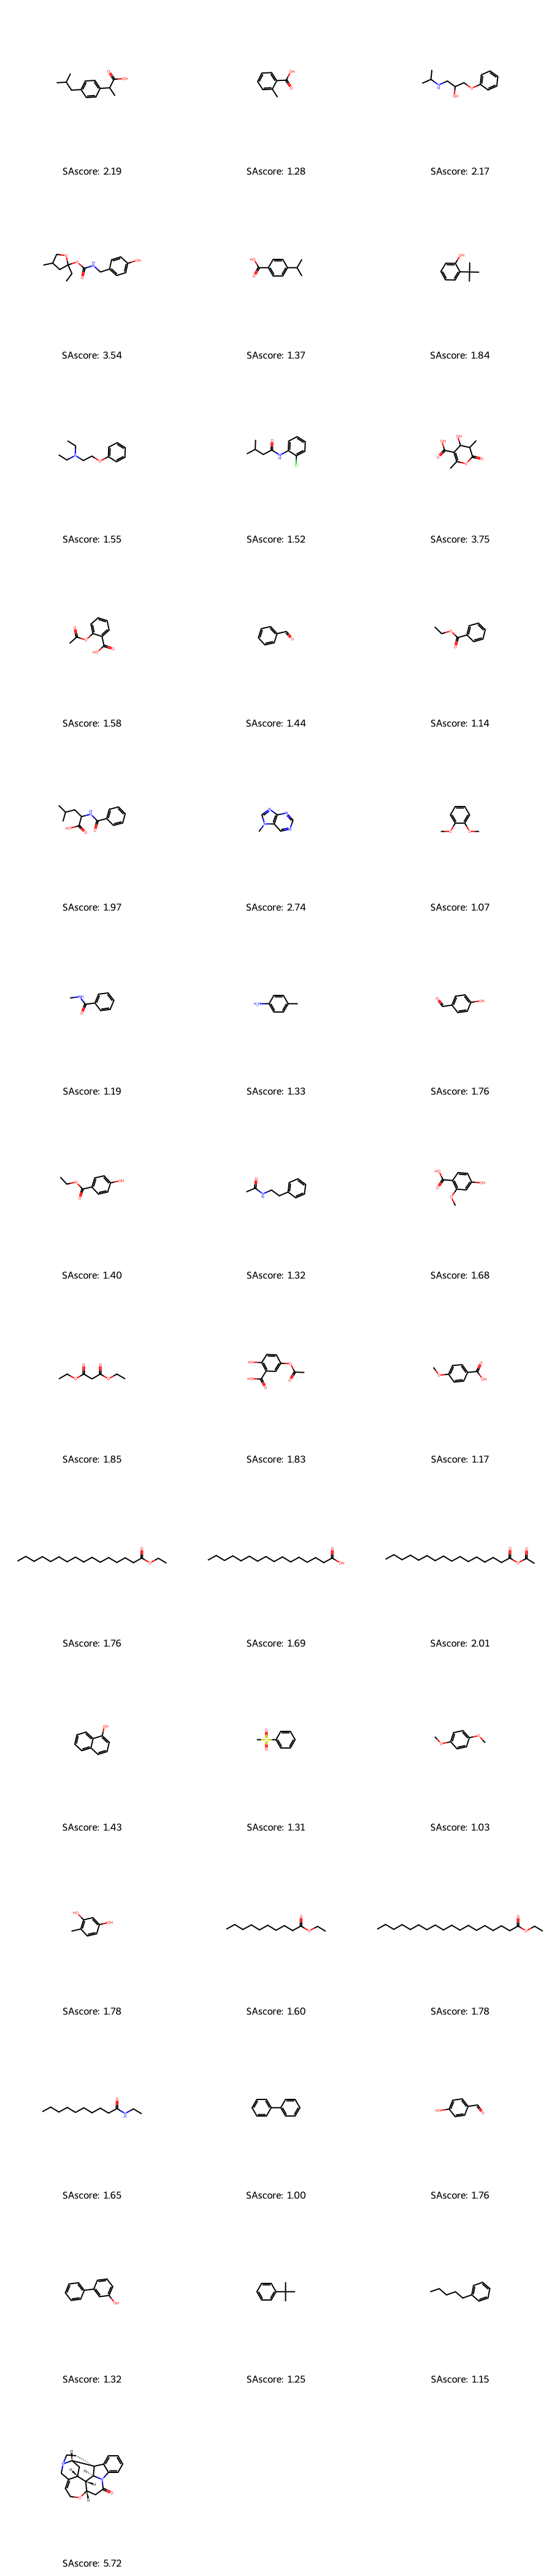

In [29]:
# Visualizing molecules with scores
mol_labels = [f'SAscore: {score:.2f}' for score in scores]
img = Draw.MolsToGridImage(molecules, legends=mol_labels, subImgSize=(300, 300))
img

### Calculating Natural Product Likeness Score

The `npscorer` module allows calculation of the natural product likeness score, which ranges from -5 to 5. Let's calculate the NP score for the example molecules.

In [30]:
# Calculating Natural Product Likeness Score
fscore = npscorer.readNPModel()
print('Reading NP model ...')

np_scores = [npscorer.scoreMol(mol, fscore) for mol in molecules]

# Printing out the NP scores
for i, smiles in enumerate(smiles_list):
    print(f"Molecule {i+1} (SMILES: {smiles}): NPscore = {np_scores[i]:.2f}")

Reading NP model ...
Molecule 1 (SMILES: CC(C)CC1=CC=C(C=C1)C(C)C(=O)O): NPscore = 0.14
Molecule 2 (SMILES: CC1=CC=CC=C1C(=O)O): NPscore = -0.62
Molecule 3 (SMILES: CC(C)NCC(O)COC1=CC=CC=C1): NPscore = -0.57
Molecule 4 (SMILES: CCC1(CC(C)CO1)OC(=O)NCC2=CC=C(C=C2)O): NPscore = 0.91
Molecule 5 (SMILES: CC(C)C1=CC=C(C=C1)C(=O)O): NPscore = -0.27
Molecule 6 (SMILES: CC(C)(C)C1=CC=CC=C1O): NPscore = 0.03
Molecule 7 (SMILES: CCN(CC)CCOC1=CC=CC=C1): NPscore = -1.38
Molecule 8 (SMILES: CC(C)CC(=O)NC1=CC=CC=C1Cl): NPscore = -1.60
Molecule 9 (SMILES: CC1=C(C(C(C(=O)O1)C)O)C(=O)O): NPscore = 1.12
Molecule 10 (SMILES: CC(=O)OC1=CC=CC=C1C(=O)O): NPscore = 0.12
Molecule 11 (SMILES: C1=CC=C(C=C1)C=O): NPscore = 0.11
Molecule 12 (SMILES: CCOC(=O)C1=CC=CC=C1): NPscore = -0.52
Molecule 13 (SMILES: CC(C)CC(C(=O)O)NC(=O)C1=CC=CC=C1): NPscore = -0.30
Molecule 14 (SMILES: CN1C=NC2=C1C=NC=N2): NPscore = -1.15
Molecule 15 (SMILES: COC1=CC=CC=C1OC): NPscore = -0.18
Molecule 16 (SMILES: CNC(=O)C1=CC=CC=C1): NPs

reading NP model ...
model in
[14:47:34] DEPRECATION WARNING: please use MorganGenerator
[14:47:34] DEPRECATION WARNING: please use MorganGenerator
[14:47:34] DEPRECATION WARNING: please use MorganGenerator
[14:47:34] DEPRECATION WARNING: please use MorganGenerator
[14:47:34] DEPRECATION WARNING: please use MorganGenerator
[14:47:34] DEPRECATION WARNING: please use MorganGenerator
[14:47:34] DEPRECATION WARNING: please use MorganGenerator
[14:47:34] DEPRECATION WARNING: please use MorganGenerator
[14:47:34] DEPRECATION WARNING: please use MorganGenerator
[14:47:34] DEPRECATION WARNING: please use MorganGenerator
[14:47:34] DEPRECATION WARNING: please use MorganGenerator
[14:47:34] DEPRECATION WARNING: please use MorganGenerator
[14:47:34] DEPRECATION WARNING: please use MorganGenerator
[14:47:34] DEPRECATION WARNING: please use MorganGenerator
[14:47:34] DEPRECATION WARNING: please use MorganGenerator
[14:47:34] DEPRECATION WARNING: please use MorganGenerator
[14:47:34] DEPRECATION WAR

### Calculating NP Score with Confidence

We can also calculate the natural product score along with a confidence value using `npscorer.scoreMolWConfidence()`. This provides additional insight into how reliable the score is.

In [31]:
# Calculating NP Score with Confidence
np_scores_confidence = [npscorer.scoreMolWConfidence(mol, fscore) for mol in molecules]

# Printing out the NP scores with confidence
for i, smiles in enumerate(smiles_list):
    score, confidence = np_scores_confidence[i].nplikeness, np_scores_confidence[i].confidence
    print(f"Molecule {i+1} (SMILES: {smiles}): NPscore = {score:.2f}, Confidence = {confidence:.2f}")

Molecule 1 (SMILES: CC(C)CC1=CC=C(C=C1)C(C)C(=O)O): NPscore = 0.14, Confidence = 1.00
Molecule 2 (SMILES: CC1=CC=CC=C1C(=O)O): NPscore = -0.62, Confidence = 1.00
Molecule 3 (SMILES: CC(C)NCC(O)COC1=CC=CC=C1): NPscore = -0.57, Confidence = 0.97
Molecule 4 (SMILES: CCC1(CC(C)CO1)OC(=O)NCC2=CC=C(C=C2)O): NPscore = 0.91, Confidence = 0.91
Molecule 5 (SMILES: CC(C)C1=CC=C(C=C1)C(=O)O): NPscore = -0.27, Confidence = 1.00
Molecule 6 (SMILES: CC(C)(C)C1=CC=CC=C1O): NPscore = 0.03, Confidence = 0.94
Molecule 7 (SMILES: CCN(CC)CCOC1=CC=CC=C1): NPscore = -1.38, Confidence = 1.00
Molecule 8 (SMILES: CC(C)CC(=O)NC1=CC=CC=C1Cl): NPscore = -1.60, Confidence = 1.00
Molecule 9 (SMILES: CC1=C(C(C(C(=O)O1)C)O)C(=O)O): NPscore = 1.12, Confidence = 0.85
Molecule 10 (SMILES: CC(=O)OC1=CC=CC=C1C(=O)O): NPscore = 0.12, Confidence = 0.96
Molecule 11 (SMILES: C1=CC=C(C=C1)C=O): NPscore = 0.11, Confidence = 1.00
Molecule 12 (SMILES: CCOC(=O)C1=CC=CC=C1): NPscore = -0.52, Confidence = 1.00
Molecule 13 (SMILES: CC

[14:49:21] DEPRECATION WARNING: please use MorganGenerator
[14:49:21] DEPRECATION WARNING: please use MorganGenerator
[14:49:21] DEPRECATION WARNING: please use MorganGenerator
[14:49:21] DEPRECATION WARNING: please use MorganGenerator
[14:49:21] DEPRECATION WARNING: please use MorganGenerator
[14:49:21] DEPRECATION WARNING: please use MorganGenerator
[14:49:21] DEPRECATION WARNING: please use MorganGenerator
[14:49:21] DEPRECATION WARNING: please use MorganGenerator
[14:49:21] DEPRECATION WARNING: please use MorganGenerator
[14:49:21] DEPRECATION WARNING: please use MorganGenerator
[14:49:21] DEPRECATION WARNING: please use MorganGenerator
[14:49:21] DEPRECATION WARNING: please use MorganGenerator
[14:49:21] DEPRECATION WARNING: please use MorganGenerator
[14:49:21] DEPRECATION WARNING: please use MorganGenerator
[14:49:21] DEPRECATION WARNING: please use MorganGenerator
[14:49:21] DEPRECATION WARNING: please use MorganGenerator
[14:49:21] DEPRECATION WARNING: please use MorganGenerat

### Discussion on Synthetic Accessibility and Natural Product Likeness Scores

The synthetic accessibility score calculated for the above molecules ranges from 1 (easy to synthesize) to 10 (difficult to synthesize). The natural product likeness score ranges from -5 to 5, with positive values indicating high resemblance to natural products and negative values indicating low resemblance.

1. **Fragment Contributions**: Common fragments that are frequently synthesized contribute positively to the synthetic accessibility score.
2. **Molecular Complexity**: Features like large rings, stereocenters, and unusual substitutions increase the complexity penalty, making synthesis more difficult.

For example, molecules like Ibuprofen and Naproxen have moderate synthetic accessibility scores due to their non-standard ring systems and substituents, while simpler molecules such as Salicylic acid tend to have lower scores due to their more straightforward synthesis paths. The natural product likeness score can provide additional information about how 'natural' a molecule is, which can be useful in lead prioritization.